In [59]:
import pandas as pd
import json
import random

* Search results without a document ID
* Document ID without a file name
* Missing filenames from cube



## Reports
* Assessment profile of CHS
* collected documents by case code

In [135]:
def create_pdf():
    val = 'S-'
    for i in range(0,7):
        val += str(random.randint(0,9))
        
    return val + '.pdf'
create_val()

'S-4272988.pdf'

In [136]:
def create_id():
    val = ''
    for i in range(0,7):
        val += str(random.randint(0,9))
        
    return val 
create_id()

'4384479'

In [288]:
def get_id():
    val= "S-"
    for i in range(0,8):
        val += str(random.randint(0,9))
        
    return val
get_id()

'S-50818040'

In [137]:
random.random()

0.7360657151226545

In [138]:
documents = []

for i in range(0,12000):
    if random.random() >.1:
        document = {"document_id" : create_id(),
                     "filename": create_val()
                     }
    else:
        document = {"document_id" : create_id(),
                     "filename": None
                     }
    documents.append(document)

    
len(documents)

12000

In [53]:
"test.pdf".replace(".pdf", "")

'test'

In [139]:
bi_cube = [{'filename':record['filename'].replace('.pdf', "")} for record in random.sample(documents, 10000) if record['filename'] is not None]

len(bi_cube)

9000

In [140]:
for i in range(0,2000):
  bi_cube.append({'filename':create_pdf().replace('.pdf', "")})


len(bi_cube)

11000

In [141]:
df_documents = pd.json_normalize(documents)
df_bi_cube = pd.DataFrame(bi_cube)

## No Filename

In [142]:
no_id = df_documents.query("filename.isna()")
no_id.count()

document_id    1197
filename          0
dtype: int64

In [143]:
df_documents['bi_key'] = df_documents['filename'].str.replace(".pdf", "")
df_documents

<ipython-input-143-486920bfed04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_documents['bi_key'] = df_documents['filename'].str.replace(".pdf", "")


,document_id,filename,bi_key
0,5486842,S-9939003.pdf,S-9939003
1,7672798,S-8111022.pdf,S-8111022
2,3984947,S-7192012.pdf,S-7192012
3,8711919,S-8968700.pdf,S-8968700
4,2447689,S-2939041.pdf,S-2939041
...,...,...,...
11995,0217217,S-9380424.pdf,S-9380424
11996,5542042,S-0318126.pdf,S-0318126
11997,6056644,S-5484044.pdf,S-5484044
11998,4359405,S-3895291.pdf,S-3895291


In [145]:
no_id = df_documents.query("bi_key.isna()")
no_id

,document_id,filename,bi_key
7,9544205,None,None
11,0152428,None,None
20,5139585,None,None
22,5920199,None,None
31,8041490,None,None
...,...,...,...
11940,2322590,None,None
11942,4128006,None,None
11943,8093059,None,None
11954,4107928,None,None


In [146]:
df_bi_cube['bi_key'] = df_bi_cube['filename']
df_bi_cube

,filename,bi_key
0,S-7073051,S-7073051
1,S-7510814,S-7510814
2,S-5811962,S-5811962
3,S-9750771,S-9750771
4,S-0237193,S-0237193
...,...,...
10995,S-2929034,S-2929034
10996,S-5808741,S-5808741
10997,S-0473239,S-0473239
10998,S-4404193,S-4404193


In [150]:
df_outer = (df_documents.set_index('bi_key')
.join(df_bi_cube.set_index("bi_key"), 
      lsuffix = "_docs", 
      rsuffix = "_cube",
     how = "outer")
.reset_index())
df_outer
# df_outer['bi_key'].notnull().value_counts()

,bi_key,document_id,filename_docs,filename_cube
0,S-0001258,0696682,S-0001258.pdf,S-0001258
1,S-0001449,3736863,S-0001449.pdf,S-0001449
2,S-0002730,NaN,NaN,S-0002730
3,S-0003529,2211002,S-0003529.pdf,S-0003529
4,S-0003651,4530939,S-0003651.pdf,S-0003651
...,...,...,...,...
14005,None,2322590,None,NaN
14006,None,4128006,None,NaN
14007,None,8093059,None,NaN
14008,None,4107928,None,NaN


In [153]:
print(len(df_outer))
print(len(df_bi_cube))
print(len(df_documents))

14010
11000
12000


In [173]:
test = {(True, False):1}
test.get((True, True))

In [239]:
lookup_dict = {True : 
               {True: 1,
                False :2},
               False:
               {True: 3,
               False: 4}}
 
pd.DataFrame.from_records(lookup_dict)

,False,True
True,3,1
False,4,2


In [240]:
lookup = {(True, True): "In Both", 
          (True, False): "In collected docs but not from bi_cube" ,
          (False, True): "In BI Cube but not collected",
          (False, False): "No filename for collected doc; no match to bi_cube"              
          
}
lookup.get((True,True))

'In Both'

In [248]:
df_lookup = pd.DataFrame.from_dict(lookup, orient = "index", columns = ["var"])
df_lookup.index = pd.MultiIndex.from_tuples(df_lookup.index)
df_lookup.index.names = ["filename_docs", "filename_cube"]
df_lookup

var
filename_docs filename_cube                                                   
True          True                                                     In Both
              False                     In collected docs but not from bi_cube
False         True                                In BI Cube but not collected
              False          No filename for collected doc; no match to bi_...

In [209]:
df = pd.DataFrame(lookup, index = [1])
df = df.melt(var_name = ["filename_docs", "filename_cube"]).set_index(["filename_docs", "filename_cube"])

In [168]:
lookup.get(True, False)

{True: 'In Both', False: 'In collected docs but not from bi_cube'}

Text(0, 0.5, '')

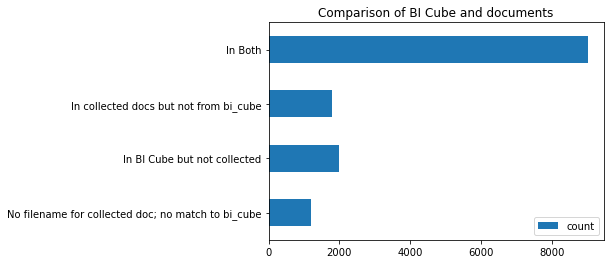

In [258]:
(df_outer
.notnull()
.groupby(['filename_docs', 'filename_cube'])
.size()
.to_frame(name='count')
# .reset_index()
# # .assign(x = lambda df: [(row['filename_docs'], row['filename_cube']) for index, row in df.iterrows()])
# # .assign(y = lambda df: df['x'].apply(lambda x: lookup.get(x))) 
# .set_index(["filename_docs", "filename_cube"])
 .join(df_lookup)
 .set_index("var")
 .plot.
 barh(title = "Comparison of BI Cube and documents")
 .set_ylabel("")
)

## Assessment Breakdown

In [301]:
category = ["Full", "Assessment", None]
weights = [.5,.4,.1]

random.choices(category, weights )

records = []

for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : random.choices(category, weights)[0]}

        records.append(record)
        
len(records)   

2259

In [302]:
for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : 'Full'}

        records.append(record)

In [303]:
for i in range(0,100):

    x_id = get_id()
    
    for i in range(0, random.randint(1,45)):

        record = {"id": x_id, 
                  "category" : 'Assessment'}

        records.append(record)

In [304]:
len(records)

6405

In [334]:
df_records = (pd.DataFrame(records)
.fillna("missing category")
             )
df_records['category'].value_counts()

Full                3180
Assessment          2983
missing category     242
Name: category, dtype: int64

In [374]:
(1183.7 - 100 - 150)/2

466.85

[Text(0, 0.5, 'Percent of Reports in Assessment'),
 Text(0.5, 0, 'Count of IDs'),
 Text(0.5, 1.0, 'ID Profile')]

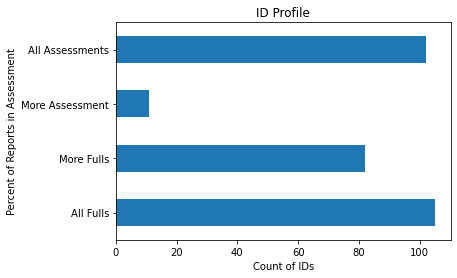

In [379]:
(df_records
 .groupby(['id', 'category'])
 .size()
 .to_frame(name = "value")
 .groupby('id')
 .transform(lambda x: x/sum(x))
 .pivot_table(index = 'id',
             columns = 'category',
             values = 'value')
 .fillna(0)
 [['Assessment']]
 .assign(cuts = lambda x: pd.cut(x['Assessment'], [-1 ,0  ,.5,.9999, 1],
                                         labels = ["All Fulls", "More Fulls", "More Assessment", "All Assessments"]))
 ['cuts']
 .value_counts()
 .sort_index()
 .plot
 .barh(title = "")
 .set(ylabel = "Percent of Reports in Assessment",
      xlabel = "Count of IDs",
      title = "ID Profile")
 

 
 
)

[Text(0, 0.5, ''), Text(0.5, 0, 'Count of IDs'), Text(0.5, 1.0, 'ID Profile')]

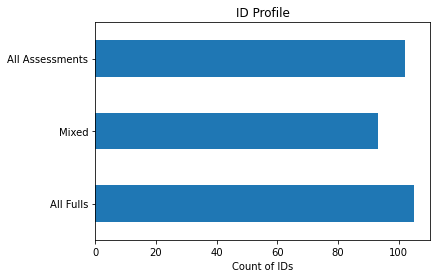

In [380]:
(df_records
 .groupby(['id', 'category'])
 .size()
 .to_frame(name = "value")
 .groupby('id')
 .transform(lambda x: x/sum(x))
 .pivot_table(index = 'id',
             columns = 'category',
             values = 'value')
 .fillna(0)
 [['Assessment']]
 .assign(cuts = lambda x: pd.cut(x['Assessment'], [-1 ,0, .9999, 1],
                                         labels = ["All Fulls", "Mixed", "All Assessments"]))
 ['cuts']
 .value_counts()
 .sort_index()
 .plot
 .barh(title = "")
 .set(ylabel = "",
      xlabel = "Count of IDs",
      title = "ID Profile")
 )